In [671]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear and Logistic Regression

### Lecture 2

In [672]:
data = pd.read_csv('data/StockX-Data-Contest-2019-3.csv')
data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


In [673]:
#Transform features name with `to lower` and replace the space between two or three words with underscore
data = data.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [674]:
#Check for empty values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    99956 non-null  object 
 1   brand         99956 non-null  object 
 2   sneaker_name  99956 non-null  object 
 3   sale_price    99956 non-null  object 
 4   retail_price  99956 non-null  object 
 5   release_date  99956 non-null  object 
 6   shoe_size     99956 non-null  float64
 7   buyer_region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [675]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
shoe_size,99956.0,9.344181,2.329588,3.5,8.0,9.5,11.0,17.0


In [676]:
any(~data.retail_price.str.startswith('$'))

False

In [677]:
#Remove dollar sign from the feature
def remove_dollar_sign(dataset, target_feature):
    for col in target_feature:
        dataset[col] = dataset[col].str.replace('$', '', regex=False).str.replace(',', '').astype(float)
    
    return dataset

data = remove_dollar_sign(data, ['sale_price', 'retail_price'])

In [678]:
data

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220.0,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220.0,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220.0,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220.0,12/26/18,11.0,California


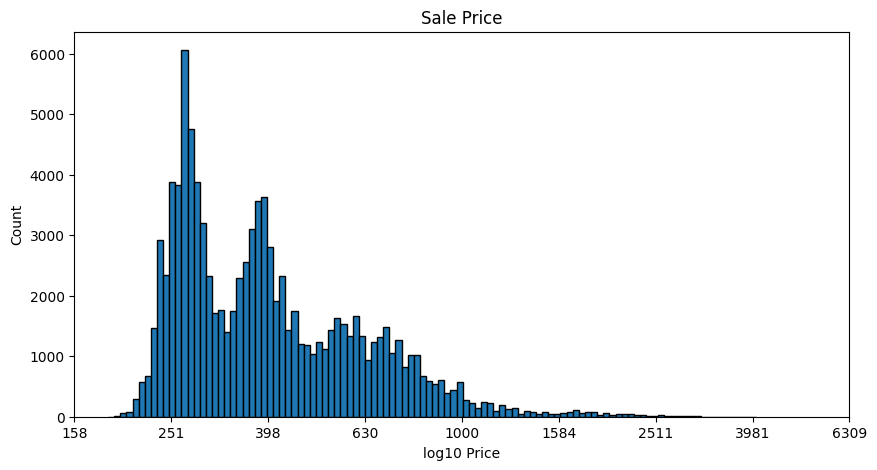

In [679]:
#Show histogram of sale_price and retail_price
plt.figure(figsize=(10, 5))
plt.hist(np.log10(data.sale_price), bins='auto', edgecolor='black')
plt.title('Sale Price')
ticks, labels = plt.xticks()
plt.xticks(ticks, [int(10 ** t) for t in ticks])
plt.xlabel('log10 Price')
plt.ylabel('Count')
plt.show()

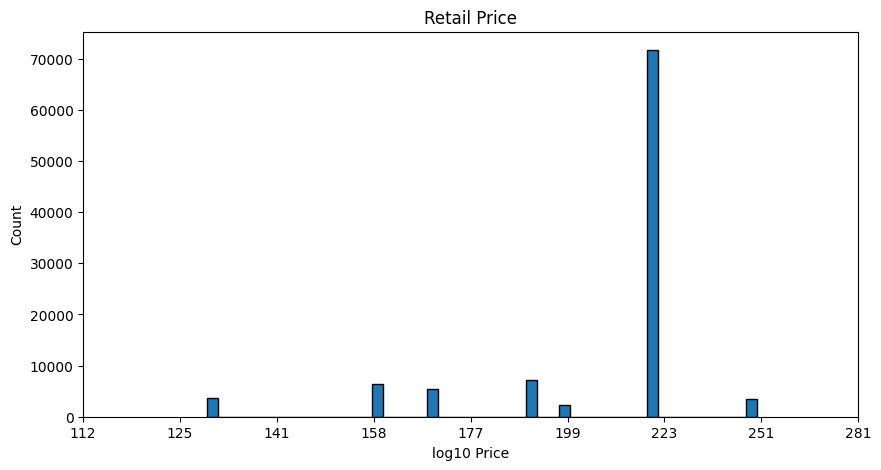

In [680]:
plt.figure(figsize=(10, 5))
plt.hist(np.log10(data.retail_price), bins=50, edgecolor='black')
plt.title('Retail Price')
ticks, label = plt.xticks()
plt.xticks(ticks, [int(10 ** t) for t in ticks])
plt.xlabel('log10 Price')
plt.ylabel('Count')
plt.show()

In [681]:
data.brand.value_counts()

brand
 Yeezy       72162
Off-White    27794
Name: count, dtype: int64

In [682]:
pd.get_dummies(data.buyer_region, drop_first=True).astype(int)

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99952,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99954,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [683]:
data = pd.concat([
    data, 
    pd.get_dummies(data.buyer_region, drop_first=True).astype(int)], 
    axis='columns')
data = data.drop(columns=['buyer_region'])

In [684]:

data = pd.concat([
    data, 
    pd.get_dummies(data.brand, drop_first=True).astype(int)], 
    axis='columns')
data = data.drop(columns=['brand'])

In [685]:
data = data.drop(columns=['sneaker_name'])

In [686]:
data

,order_date,sale_price,retail_price,release_date,shoe_size,Alaska,Arizona,Arkansas,California,Colorado,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Off-White
0,9/1/17,1097.0,220.0,9/24/16,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9/1/17,685.0,220.0,11/23/16,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9/1/17,690.0,220.0,11/23/16,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9/1/17,1075.0,220.0,11/23/16,11.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9/1/17,828.0,220.0,2/11/17,11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2/13/19,565.0,220.0,12/26/18,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99952,2/13/19,598.0,220.0,12/26/18,8.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
99953,2/13/19,605.0,220.0,12/26/18,5.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99954,2/13/19,650.0,220.0,12/26/18,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [687]:
data.order_date.str.split('/', expand=True)

,0,1,2
0,9,1,17
1,9,1,17
2,9,1,17
3,9,1,17
4,9,1,17
...,...,...,...
99951,2,13,19
99952,2,13,19
99953,2,13,19
99954,2,13,19


In [688]:
data.order_date = pd.to_datetime(data.order_date)
data.release_date = pd.to_datetime(data.release_date)


C:\Users\sveto\AppData\Local\Temp\ipykernel_2712\536809196.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.order_date = pd.to_datetime(data.order_date)
C:\Users\sveto\AppData\Local\Temp\ipykernel_2712\536809196.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.release_date = pd.to_datetime(data.release_date)


In [689]:
data

,order_date,sale_price,retail_price,release_date,shoe_size,Alaska,Arizona,Arkansas,California,Colorado,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Off-White
0,2017-09-01,1097.0,220.0,2016-09-24,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-09-01,685.0,220.0,2016-11-23,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-09-01,690.0,220.0,2016-11-23,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-09-01,1075.0,220.0,2016-11-23,11.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-09-01,828.0,220.0,2017-02-11,11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,565.0,220.0,2018-12-26,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99952,2019-02-13,598.0,220.0,2018-12-26,8.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
99953,2019-02-13,605.0,220.0,2018-12-26,5.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99954,2019-02-13,650.0,220.0,2018-12-26,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [690]:
dates = pd.DataFrame(
    {
    'order_day': data.order_date.dt.day,
    'order_month': data.order_date.dt.month,
    'order_year': data.order_date.dt.year,
    'release_day': data.release_date.dt.day,
    'release_month': data.release_date.dt.month,
    'release_year': data.release_date.dt.year,
    }
)

data = pd.concat([data, dates], axis='columns').drop(columns=['order_date', 'release_date'])

In [691]:
data

,sale_price,retail_price,shoe_size,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,West Virginia,Wisconsin,Wyoming,Off-White,order_day,order_month,order_year,release_day,release_month,release_year
0,1097.0,220.0,11.0,0,0,0,1,0,0,0,...,0,0,0,0,1,9,2017,24,9,2016
1,685.0,220.0,11.0,0,0,0,1,0,0,0,...,0,0,0,0,1,9,2017,23,11,2016
2,690.0,220.0,11.0,0,0,0,1,0,0,0,...,0,0,0,0,1,9,2017,23,11,2016
3,1075.0,220.0,11.5,0,0,0,0,0,0,0,...,0,0,0,0,1,9,2017,23,11,2016
4,828.0,220.0,11.0,0,0,0,0,0,0,0,...,0,0,0,0,1,9,2017,11,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,565.0,220.0,8.0,0,0,0,0,0,0,0,...,0,0,0,0,13,2,2019,26,12,2018
99952,598.0,220.0,8.5,0,0,0,1,0,0,0,...,0,0,0,0,13,2,2019,26,12,2018
99953,605.0,220.0,5.5,0,0,0,0,0,0,0,...,0,0,0,0,13,2,2019,26,12,2018
99954,650.0,220.0,11.0,0,0,0,1,0,0,0,...,0,0,0,0,13,2,2019,26,12,2018


## Machine Learning stage

In [692]:
features = data.drop(columns='sale_price')
targets = data.sale_price

In [693]:
model = LinearRegression()
model.fit(features, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [694]:
model.coef_

array([ 1.24615221e-01,  3.02090933e+00,  1.22975463e+00,  2.05910665e+01,
        1.18162780e+01,  3.39763387e+01,  1.02513717e+01, -1.36591925e+00,
        8.63022347e+01,  2.36310376e+01,  1.37014581e+01,  5.74171111e+00,
        2.01327086e+01, -1.76649420e+01,  8.04313231e+00,  8.12552394e+00,
        2.42168844e+01,  2.00516917e+01,  5.46641565e+01,  5.74183025e+00,
       -5.48394486e+00,  8.96922169e+00,  1.49132456e+01,  1.69441622e+01,
        1.10148804e+01, -2.15590805e+00,  1.11908722e+01,  1.87005695e+01,
        1.65713308e+01,  4.45810141e+01,  3.23563746e+00,  2.24323203e+01,
        1.45058760e+01,  2.21649199e+01,  1.42549767e+00,  6.54344593e+00,
        3.59992671e+00,  5.90944385e+00,  6.67730499e+01,  1.15307449e+01,
        1.36119678e-02,  1.38046256e+01,  1.19698372e+01,  1.73466203e+01,
        6.48888157e+00,  8.39915232e+00,  1.00167366e+01,  1.79457169e+01,
        1.70890001e+01,  1.57083531e-01,  1.44930906e+01,  1.06387866e+01,
        3.66662415e+02,  

In [695]:
model.intercept_

np.float64(462529.9920958793)